# Classifier

Ref: https://youtu.be/3mpDXAXFkfg<br>
https://github.com/MorvanZhou/tutorials/blob/master/kerasTUT/4-regressor_example.py

Step
1. prepare data
2. preprocess data
3. keras.models.Squential() - build the model 
4. keras.optimizers... - define optimizer
5. model.compile() - choose loss funcion and optimizer
6. model.fit() - train the model
7. model.evaluate() - test the model
8. model.predict() - predict the input

In [2]:
import numpy as np
np.random.seed(1337)    # for reproducibility
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import RMSprop
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
# load data from mnist 
# X shape = (60000, 28, 28)/ Y shape = (10000, 28, 28)
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)

# preprocess the data
# X reshape to (60000, 784)
X_train = X_train.reshape(X_train.shape[0], -1) /255    # normalize to 0~1
X_test = X_test.reshape(X_test.shape[0], -1) /255    # normalize
Y_train = np_utils.to_categorical(Y_train, num_classes=10)  # one-hot encoding
Y_test = np_utils.to_categorical(Y_test, num_classes=10)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (60000, 28, 28)
X_test shape: (10000, 28, 28)
Y_train shape: (60000,)
Y_test shape: (10000,)
X_train shape: (60000, 784)
X_test shape: (10000, 784)
Y_train shape: (60000, 10)
Y_test shape: (10000, 10)


In [4]:
# build model
model = Sequential([
    Dense(32, input_dim=784), 
    Activation("relu"),
    Dense(10), 
    Activation("softmax")
])

# define optimizer
rmsprop = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

# choose loss function and optimizer
model.compile(
    loss="categorical_crossentropy", 
    optimizer=rmsprop, 
    metrics=["accuracy"]    # 輸出更多指標在return中 https://keras.io/api/metrics/
)

In [5]:
# train model
print("Training ---------------------")
model.fit(X_train, Y_train, epochs=10, batch_size=32)


Training ---------------------
Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3454 - accuracy: 0.9039
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1915 - accuracy: 0.9452: 0s - loss: 0.193
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1538 - accuracy: 0.9560
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1333 - accuracy: 0.9617
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1209 - accuracy: 0.9656
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1111 - accuracy: 0.9690
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1044 - accuracy: 0.9708
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0989 - accuracy: 0.9725
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0953 - accuracy: 0.9734
Epoch 10/10
1875/1875 [==========

In [6]:
# test model
print("Testing ---------------------")
loss, accuracy = model.evaluate(X_test, Y_test)
print("loss: ", loss)
print("accuracy: ", accuracy)

Testing ---------------------
313/313 [==============================] - 1s 2ms/step - loss: 0.1254 - accuracy: 0.9653
loss:  0.12538987398147583
accuracy:  0.9653000235557556


[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


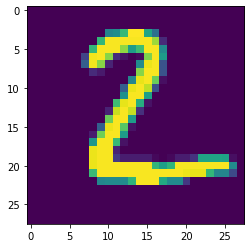

In [7]:
# predict
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

number = X_test[1]
plt.imshow(number)
number = number.reshape(1, 784)
# print(number)
result = model.predict(number)
print(result[0])